In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [16,8]

# Boa para prever dados sem tendencia e sem padrão sazonal claro

In [2]:
df = pd.read_excel('serie_historica_volume_portos.xlsx')
planta = input("Qual planta e processo para escolher: ")

In [3]:
df_2 = df[df['PLANTA_PROCESSO'] == planta]
df_2.sort_values('DATA')

,PLANTA_PROCESSO,DATA,TOTAL_VALOR
13286,4131 - CBPS | DESCARGA,2017-08-31 12:00:00,40161.000
11401,4131 - CBPS | DESCARGA,2017-09-01 12:00:00,43882.000
11229,4131 - CBPS | DESCARGA,2017-09-02 12:00:00,31013.000
11101,4131 - CBPS | DESCARGA,2017-09-03 12:00:00,70691.000
12147,4131 - CBPS | DESCARGA,2017-09-04 12:00:00,58964.000
...,...,...,...
11079,4131 - CBPS | DESCARGA,2022-08-25 12:00:00,41857.000
12111,4131 - CBPS | DESCARGA,2022-08-26 12:00:00,79114.000
12511,4131 - CBPS | DESCARGA,2022-08-27 12:00:00,83515.514
12699,4131 - CBPS | DESCARGA,2022-08-28 12:00:00,82182.637


In [4]:
df_g = df_2.resample(rule='M', on='DATA')['TOTAL_VALOR'].sum()

### Aplicando o modelo Arima

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

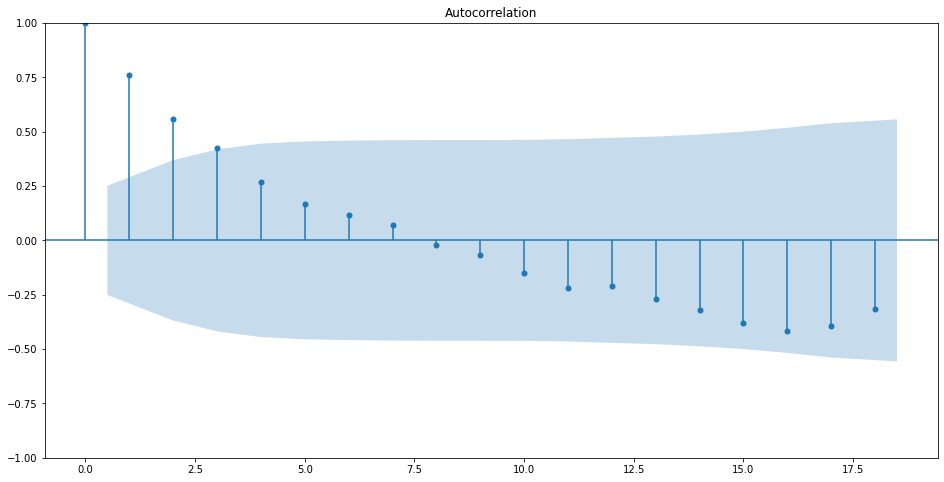

In [8]:
plot_acf(df_g)
plt.show()

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


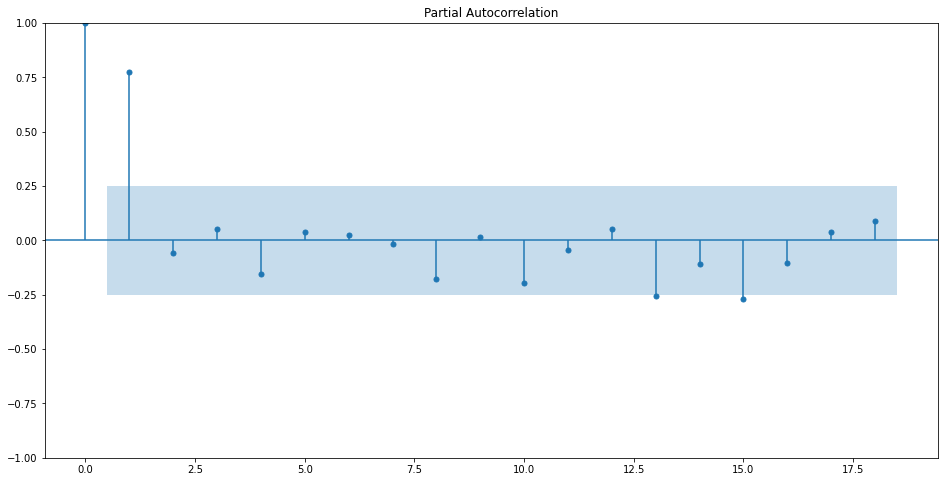

In [9]:
plot_pacf(df_g)
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA

Agora vamos ver com de Holt's linear trend (amortecida)

In [41]:
modelo = ARIMA(df_g, order=(3,3,3))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

# Verificar os indices AIC e BIC
# (5,1,0) = AIC 1713.362 e BIC 1725.928
# (2,1,2) = AIC 1719.504 e BIC 1713.128
# (2,1,1) = AIC 1710.630 e BIC 1719.008
# O objetivo e minimizar estes valores para melhorar a performance



c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            TOTAL_VALOR   No. Observations:                   61
Model:                 ARIMA(3, 3, 3)   Log Likelihood                -825.404
Date:                Thu, 15 Dec 2022   AIC                           1664.809
Time:                        15:56:32   BIC                           1679.232
Sample:                    08-31-2017   HQIC                          1670.427
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7913     40.125     -0.020      0.984     -79.434      77.852
ar.L2          0.0694      8.146      0.009      0.993     -15.896      16.035
ar.L3         -0.1324      5.426     -0.024      0.9

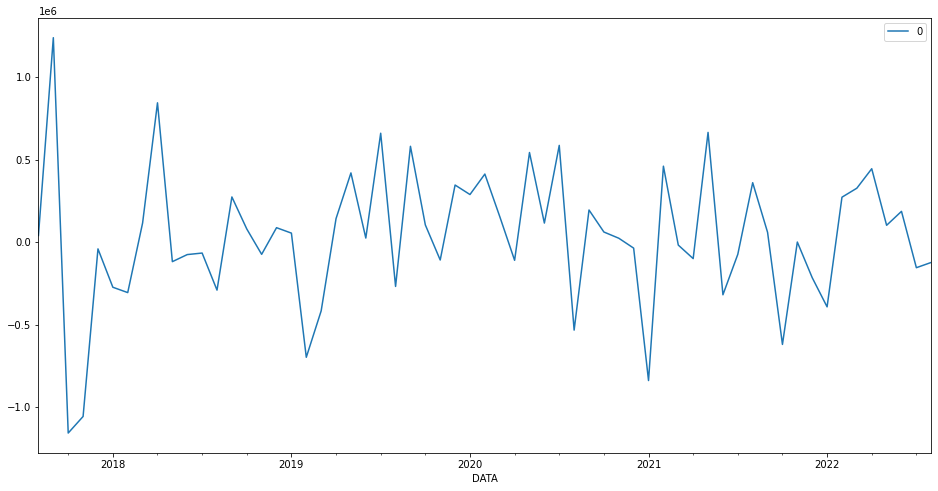

In [42]:
#Também avaliar os resíduos, que estejam estacionários (mesma variancia)

residuos = pd.DataFrame(modelo_fit.resid)
residuos.plot()
plt.show()

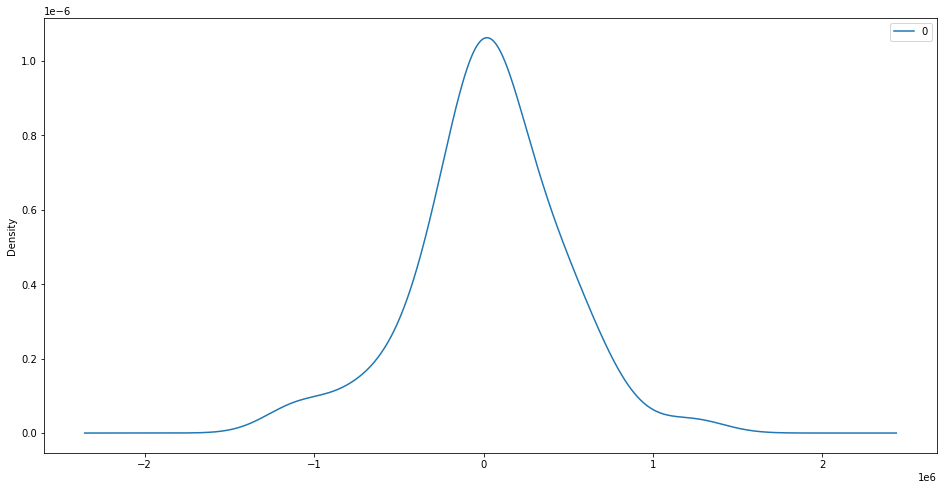

                  0
count  6.100000e+01
mean   2.913731e+04
std    4.243444e+05
min   -1.156671e+06
25%   -1.230981e+05
50%    4.016100e+04
75%    2.735389e+05
max    1.238343e+06


In [43]:
# Também podemos ver a distribuição se está em zero. Precisa estar em zero
residuos.plot(kind='kde')
plt.show()
print(residuos.describe())

### Hold out para avaliar a qualidade do modelo

In [46]:
x = df_g.values

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


previsto=1143930.996785, esperado=1724807.917000, diferenca=-580876.920215
previsto=2101452.154255, esperado=1574658.794000, diferenca=526793.360255
previsto=1539247.527547, esperado=1395461.275000, diferenca=143786.252547
previsto=1484612.787781, esperado=1737953.653000, diferenca=-253340.865219
previsto=1837250.987289, esperado=1920158.348000, diferenca=-82907.360711
previsto=2010893.696830, esperado=1328342.803000, diferenca=682550.893830
previsto=1194000.093934, esperado=1169209.886000, diferenca=24790.207934
previsto=1069165.631947, esperado=985117.362000, diferenca=84048.269947
previsto=680961.967098, esperado=541859.669000, diferenca=139102.298098
previsto=166254.983561, esperado=679615.028000, diferenca=-513360.044439
previsto=629364.133343, esperado=1043109.000000, diferenca=-413744.866657
previsto=1027689.468146, esperado=1518476.000000, diferenca=-490786.531854
previsto=1900792.131589, esperado=1679180.000000, diferenca=221612.131589
previsto=1921287.898882, esperado=1855460

c:\Users\LVVE2K631\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


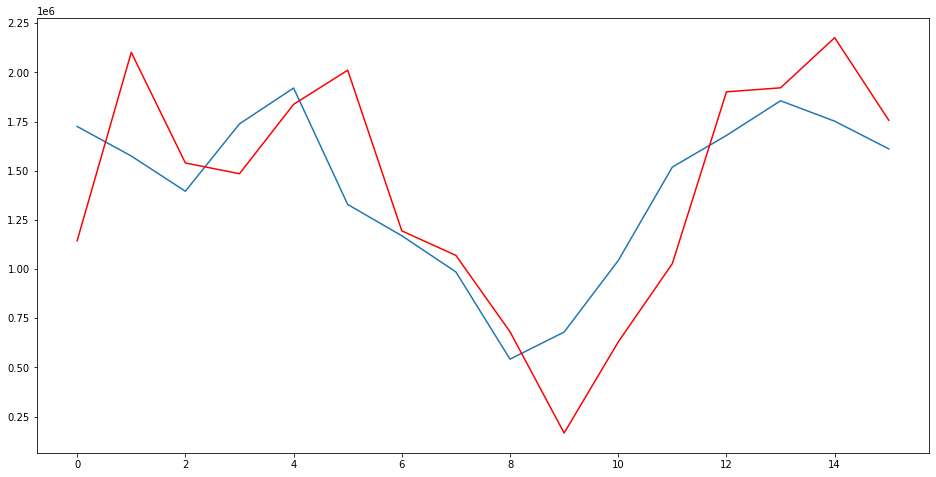

In [60]:
size = int(len(x) * 0.75)
train, test = x[0:size], x[size:len(x)]
hist = [x for x in train]
predicoes = list()
for t in range(len(test)):
    model=ARIMA(hist,order=(3,3,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predicoes.append(yhat)
    obs = test[t]
    hist.append(obs)
    print('previsto=%f, esperado=%f, diferenca=%f' % (yhat, obs, yhat-obs))

plt.plot(test)
plt.plot(predicoes, color='red')
plt.show()